In [1]:
# Import general useful packages
import numpy as np
import pandas as pd

# Import matplotlib for visualisations
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import scikitplot as skplt

# Import all machine learning algorithms
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

# Import other useful subpackage
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV , train_test_split , cross_val_score

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loadning trainning and testing data
training_data = pd.read_csv('Dataset_1.csv')
testing_data = pd.read_csv('Dataset_2.csv')
print(training_data.info())
print(testing_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Columns: 302 entries, id to 299
dtypes: float64(301), int64(1)
memory usage: 590.0 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19750 entries, 0 to 19749
Columns: 302 entries, id to 299
dtypes: float64(301), int64(1)
memory usage: 45.5 MB
None


In [3]:
# For training data
print("Training Data: {}".format(training_data.shape))
print("Null values present in training data: {}".format(training_data.isnull().values.any()))
  
# For testing data
print("Testing Data: {}".format(testing_data.shape))
print("Null values present in testing data: {}".format(testing_data.isnull().values.any()))

##Its showing NULL value presents in testing data only due to Target column. So we can ignore.

Training Data: (250, 302)
Null values present in training data: False
Testing Data: (19750, 302)
Null values present in testing data: True


In [4]:
#training_data.head(5)
training_data.head(5)

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
0,0,1.0,-0.098,2.165,0.681,-0.614,1.309,-0.455,-0.236,0.276,...,0.867,1.347,0.504,-0.649,0.672,-2.097,1.051,-0.414,1.038,-1.065
1,1,0.0,1.081,-0.973,-0.383,0.326,-0.428,0.317,1.172,0.352,...,-0.165,-1.695,-1.257,1.359,-0.808,-1.624,-0.458,-1.099,-0.936,0.973
2,2,1.0,-0.523,-0.089,-0.348,0.148,-0.022,0.404,-0.023,-0.172,...,0.013,0.263,-1.222,0.726,1.444,-1.165,-1.544,0.004,0.800,-1.211
3,3,1.0,0.067,-0.021,0.392,-1.637,-0.446,-0.725,-1.035,0.834,...,-0.404,0.640,-0.595,-0.966,0.900,0.467,-0.562,-0.254,-0.533,0.238
4,4,1.0,2.347,-0.831,0.511,-0.021,1.225,1.594,0.585,1.509,...,0.898,0.134,2.415,-0.996,-1.006,1.378,1.246,1.478,0.428,0.253


1.0    160
0.0     90
Name: target, dtype: int64


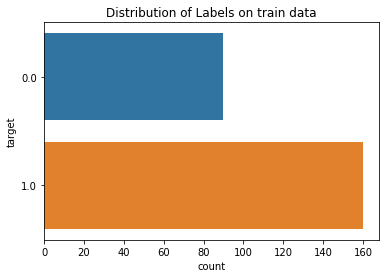

In [5]:
#Distribution of Labels on train data
ax = sns.countplot(y=training_data['target'])
xx=training_data['target'].value_counts()
print(xx)
ax.set_title('Distribution of Labels on train data')
plt.show()

##the target in data set is imbalance. target is binary and has some disbalance: 36% of samples belong to 0 class;

In [6]:
# Univariate Analysis
training_data.describe()

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,...,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,124.500000,0.640000,0.023292,-0.026872,0.167404,0.001904,0.001588,-0.007304,0.032052,0.078412,...,0.044652,0.126344,0.018436,-0.012092,-0.065720,-0.106112,0.046472,0.006452,0.009372,-0.128952
std,72.312977,0.480963,0.998354,1.009314,1.021709,1.011751,1.035411,0.955700,1.006657,0.939731,...,1.011416,0.972567,0.954229,0.960630,1.057414,1.038389,0.967661,0.998984,1.008099,0.971219
min,0.000000,0.000000,-2.319000,-2.931000,-2.477000,-2.359000,-2.566000,-2.845000,-2.976000,-3.444000,...,-2.804000,-2.443000,-2.757000,-2.466000,-3.287000,-3.072000,-2.634000,-2.776000,-3.211000,-3.500000
25%,62.250000,0.000000,-0.644750,-0.739750,-0.425250,-0.686500,-0.659000,-0.643750,-0.675000,-0.550750,...,-0.617000,-0.510500,-0.535750,-0.657000,-0.818500,-0.821000,-0.605500,-0.751250,-0.550000,-0.754250
50%,124.500000,1.000000,-0.015500,0.057000,0.184000,-0.016500,-0.023000,0.037500,0.060500,0.183500,...,0.067500,0.091000,0.057500,-0.021000,-0.009000,-0.079500,0.009500,0.005500,-0.009000,-0.132500
75%,186.750000,1.000000,0.677000,0.620750,0.805000,0.720000,0.735000,0.660500,0.783250,0.766250,...,0.797250,0.804250,0.631500,0.650250,0.739500,0.493000,0.683000,0.794250,0.654250,0.503250
max,249.000000,1.000000,2.567000,2.419000,3.392000,2.771000,2.901000,2.793000,2.546000,2.846000,...,2.865000,2.801000,2.736000,2.596000,2.226000,3.131000,3.236000,2.626000,3.530000,2.771000


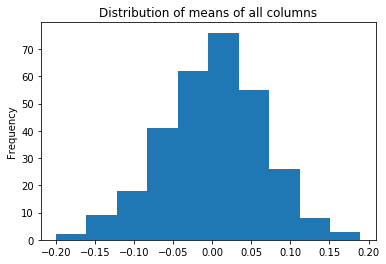

In [7]:
#Distribution of means of all columns
training_data[training_data.columns[2:]].mean().plot('hist');
plt.title('Distribution of means of all columns');

In [8]:
#Correlation Check (Multicolinearity)
corrs = training_data.corr().abs().unstack().sort_values(kind="quicksort").reset_index()
corrs = corrs[corrs['level_0'] != corrs['level_1']]
corrs.tail(10)

,level_0,level_1,0
90892,22,28,0.246062
90893,28,22,0.246062
90894,193,101,0.252825
90895,101,193,0.252825
90896,75,32,0.259315
90897,32,75,0.259315
90898,target,65,0.293846
90899,65,target,0.293846
90900,33,target,0.373608
90901,target,33,0.373608


In [9]:
#We can see that correlations between features are lower that 0.3 and the most correlated feature with target 
#has correlation of 0.37. So we have no highly correlated features which we could drop, 
#on the other hand we could drop some columns with have little correlation with the target.

In [10]:
#To split the Features and Target values of both Training and Test dataset
# Get X and y for training data
y_train = training_data['target']
X_train = training_data.drop(columns = ['target', 'id'])

# Get X and y for testing data
y_test = testing_data['target'] # it is blank, but have to remove from X_test
X_test = testing_data.drop(columns = ['target', 'id'])

In [11]:
#K-fold stratified cross validation on Dataset1 to check over fitting...
n_fold = 10
folds = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=42)
repeated_folds = RepeatedStratifiedKFold(n_splits=20, n_repeats=20, random_state=42)

In [12]:
#Standardize features by removing the mean and scaling to unit variance
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [13]:
#Cross Validation to reduce overfitting of the data
#Appling Logistic regression for binary classification
#for small samples set, So better to limited yourself to linear models.

random_state = 42
lr_clf = LogisticRegression(random_state = random_state, solver='liblinear', max_iter=1000)
param_grid = {'class_weight' : ['balanced', None], 
                'penalty' : ['l2','l1'],  
                'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

#Find best hyperparameters using GridSearchCV (roc_auc)
grid_lr = GridSearchCV(estimator = lr_clf, param_grid = param_grid , cv=folds, scoring = 'roc_auc', verbose = 1, n_jobs = -1)
grid_lr.fit(X_train,y_train)

print("Best Score:" + str(grid_lr.best_score_))
print("Best Parameters: " + str(grid_lr.best_params_))

#model with best parameters
model_lr=LogisticRegression(class_weight='balanced', solver='liblinear', penalty ='l1', C= 0.1, max_iter=10000)
model_lr.fit(X_train,y_train)
# To Cross validate and remodel it with less features
# cv - number of runs to find cross validated model

#Score of each cross validation score
scores_lr = model_selection.cross_val_score(model_lr,X_train,y_train,scoring="roc_auc",cv=10)
print(scores_lr) # moreover consistance score for flods
scores_lr = np.mean(scores_lr)
print('Mean cv Score',scores_lr)
print("Score on training data: " + str(model_lr.score(X_train,y_train)*100) + "%")

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    3.4s


Best Score:0.804861111111111
Best Parameters: {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1'}
[0.91666667 0.59027778 0.61111111 0.98611111 0.82638889 0.85416667
 0.90277778 0.74305556 0.75694444 0.83333333]
Mean cv Score 0.8020833333333334
Score on training data: 87.6%


[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:    5.2s finished


In [14]:
# tring to apply various classification algorithmns to check wheather gerring consistance CV scores
from sklearn.svm import SVC
svc = SVC(probability=True, gamma='scale')

parameter_grid = {'C': [0.001, 0.01, 0.1, 1.0, 10.0],
                  'kernel': ['linear', 'poly', 'rbf'],
                 }

grid_search_svc = GridSearchCV(svc, param_grid=parameter_grid, cv=folds, scoring='roc_auc', n_jobs=-1)
grid_search_svc.fit(X_train, y_train)
print('Best score: {}'.format(grid_search_svc.best_score_))
print('Best parameters: {}'.format(grid_search_svc.best_params_))

model_svc = SVC(probability=True, gamma='scale', **grid_search_svc.best_params_)
model_svc.fit(X_train,y_train)

#Cross Validation to reduce overfitting of the data
scores_svc = model_selection.cross_val_score(model_svc,X_train,y_train,scoring="roc_auc",cv=10)
print(scores_svc)   #less consistance than LR
scores_svc = np.mean(scores_svc)
print('Mean cv Score',scores_svc)
print("Score on training data: " + str(model_svc.score(X_train,y_train)*100) + "%")

Best score: 0.788888888888889
Best parameters: {'C': 10.0, 'kernel': 'rbf'}
[0.81944444 0.65277778 0.67361111 0.75       0.88194444 0.63194444
 0.79861111 0.71527778 0.72916667 0.81944444]
Mean cv Score 0.7472222222222222
Score on training data: 100.0%


In [15]:
#lets check another one
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()

parameter_grid = {'n_neighbors': [2, 3, 5, 10, 20],
                  'weights': ['uniform', 'distance'],
                  'leaf_size': [5, 10, 30]
                 }

grid_search_knc = GridSearchCV(knc, param_grid=parameter_grid, cv=folds, scoring='roc_auc', n_jobs=-1)
grid_search_knc.fit(X_train, y_train)
print('Best score: {}'.format(grid_search_knc.best_score_))
print('Best parameters: {}'.format(grid_search_knc.best_params_))

model_knn = KNeighborsClassifier(**grid_search_knc.best_params_)
model_knn.fit(X_train,y_train)

#Cross Validation to reduce overfitting of the data
scores_knn = model_selection.cross_val_score(model_knn,X_train,y_train,scoring="roc_auc",cv=10)
print(scores_knn) #scores are less compare to above two algorithms
scores_knn = np.mean(scores_knn)
print('Mean cv Score',scores_knn)
print("Score on training data: " + str(model_knn.score(X_train,y_train)*100) + "%")

Best score: 0.6333333333333334
Best parameters: {'leaf_size': 5, 'n_neighbors': 10, 'weights': 'distance'}
[0.77777778 0.61111111 0.63194444 0.47222222 0.65277778 0.52777778
 0.68055556 0.5        0.5        0.72916667]
Mean cv Score 0.6083333333333333
Score on training data: 100.0%


In [16]:
## for small samples set, using non linear models that RF, GBM or XGB, thats not gonna work. 
## But still appling ensemble learning algorithm (Bagging and Boosting)
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

parameter_grid = {'n_estimators': [10, 50, 100, 1000],
                  'max_depth': [None, 3, 5, 15]
                 }

grid_rf = GridSearchCV(rfc, param_grid=parameter_grid, cv=folds, scoring='roc_auc', n_jobs=-1)
grid_rf.fit(X_train, y_train)
print('Best score: {}'.format(grid_rf.best_score_))
print('Best parameters: {}'.format(grid_rf.best_params_))

model_rfc = RandomForestClassifier(**grid_rf.best_params_)
model_rfc.fit(X_train,y_train)

#Cross Validation to reduce overfitting of the data
scores_rf = model_selection.cross_val_score(model_rfc,X_train,y_train,scoring="roc_auc",cv=10)
print(scores_rf)
scores_rf = np.mean(scores_rf)
print('Mean cv Score',scores_rf)
print("Score on training data: " + str(model_rfc.score(X_train,y_train)*100) + "%")

Best score: 0.775
Best parameters: {'max_depth': 5, 'n_estimators': 1000}
[0.73611111 0.61111111 0.69444444 0.83333333 0.75694444 0.71527778
 0.88888889 0.84027778 0.75       0.59027778]
Mean cv Score 0.7416666666666667
Score on training data: 100.0%


In [17]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()

parameter_grid = {'n_estimators': [5, 10, 20, 50, 100],
                  'learning_rate': [0.001, 0.01, 0.1, 1.0, 10.0]
                 }

grid_search_abc = GridSearchCV(abc, param_grid=parameter_grid, cv=folds, scoring='roc_auc')
grid_search_abc.fit(X_train, y_train)
print('Best score: {}'.format(grid_search_abc.best_score_))
print('Best parameters: {}'.format(grid_search_abc.best_params_))

model_abc = AdaBoostClassifier(**grid_search_abc.best_params_)
model_abc.fit(X_train,y_train)

#Cross Validation to reduce overfitting of the data
scores_abc = model_selection.cross_val_score(model_abc,X_train,y_train,scoring="roc_auc",cv=10)   
print(scores_abc)
scores_abc = np.mean(scores_abc)
print('Mean cv Score',scores_abc)
print("Score on training data: " + str(model_abc.score(X_train,y_train)*100) + "%")

Best score: 0.7194444444444444
Best parameters: {'learning_rate': 0.1, 'n_estimators': 20}
[0.81597222 0.56597222 0.62847222 0.84027778 0.67708333 0.72222222
 0.84027778 0.60763889 0.68055556 0.73611111]
Mean cv Score 0.7114583333333332
Score on training data: 77.2%


  Algorithm     Score
0        LR  0.802083
1       SVC  0.747222
2       KNC  0.608333
3       RFC  0.741667
4       ABC  0.711458


Text(0.5, 1.0, 'CV_Score of various algorithms')

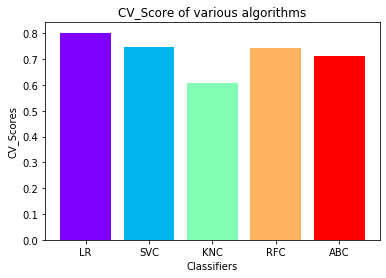

In [18]:
## CV_Score of various algorithms (Bar plot)
df = pd.DataFrame({'Algorithm':['LR','SVC','KNC','RFC', 'ABC'],
                   'Score':[scores_lr,scores_svc,scores_knn,scores_rf,scores_abc]})
print(df)
CV_Scores  = df['Score']
colors = cm.rainbow(np.linspace(0, 2, 9))
#labels = ['LogisticRegression','SVC','KNeighborsClassifier','RandomForestClassifier', 'AdaBoostClassifier']
labels = df['Algorithm']

plt.bar(labels,
        CV_Scores,
        color = colors)
plt.xlabel('Classifiers')
plt.ylabel('CV_Scores')
plt.title('CV_Score of various algorithms')

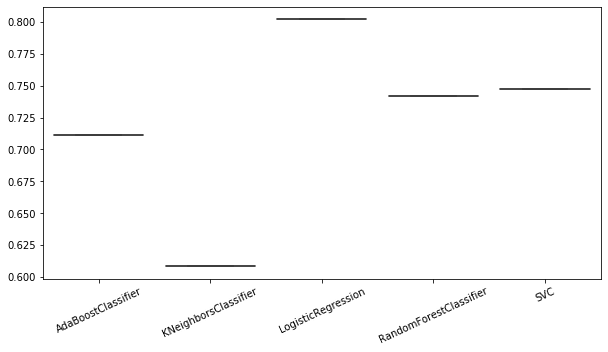

In [19]:
## CV_Score of various algorithms (Box-Plot)
plt.figure(figsize=(10, 5));
scores_df1 = pd.DataFrame({'LogisticRegression': [scores_lr]})
scores_df2 = pd.DataFrame({'AdaBoostClassifier': [scores_abc]})
scores_df3 = pd.DataFrame({'SVC': [scores_svc]})
scores_df4 = pd.DataFrame({'KNeighborsClassifier': [scores_knn]})
scores_df5 = pd.DataFrame({'RandomForestClassifier': [scores_rf]})
df = scores_df1.append([scores_df2, scores_df3, scores_df4, scores_df5],  ignore_index=True)
sns.boxplot(data=df);
plt.xticks(rotation=25);

In [20]:
#We can see that logistic regression is superior to most other models. 
#It seems that other models either overfit or can't work on this small dataset.

In [21]:
##Furure scope::
#  1. can check with other algorithms like Naive Bayes, extratree classifier, SGDClassifier etc  and compare CV scores
#  2. feature selection (variable reduction) 

In [22]:
## Now I am going to split trainning data set (250 observations) by 80/20 set 
#and training model on 80 % randon sample and predicting on 20% sample to check model accuracy

In [23]:
# Spliting data (80/20)
y = training_data['target']
X = training_data.drop(columns = ['target', 'id'])
from sklearn.model_selection import train_test_split
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X, y, test_size = 0.2, random_state = 3)

In [24]:
# Applying various Classification algorithms without doing variable reductions
accuracy_scores = np.zeros(6)

# Support Vector Classifier
clf_svc = SVC().fit(X_train_new, y_train_new)
prediction1 = clf_svc.predict(X_test_new)
accuracy_scores[0] = accuracy_score(y_test_new, prediction1)*100
print('Support Vector Classifier accuracy: {}%'.format(accuracy_scores[0]))

# Logistic Regression
clf_lr = LogisticRegression(class_weight = 'balanced').fit(X_train_new, y_train_new)
prediction2 = clf_lr.predict(X_test_new)
accuracy_scores[1] = accuracy_score(y_test_new, prediction2)*100
print('Logistic Regression accuracy: {}%'.format(accuracy_scores[1]))

# K Nearest Neighbors
clf_knn = KNeighborsClassifier( ).fit(X_train_new, y_train_new)
prediction3 = clf_knn.predict(X_test_new)
accuracy_scores[2] = accuracy_score(y_test_new, prediction3)*100
print('K Nearest Neighbors Classifier accuracy: {}%'.format(accuracy_scores[2]))

# Random Forest
clf_rf = RandomForestClassifier(class_weight = 'balanced').fit(X_train_new, y_train_new)
prediction4 = clf_rf.predict(X_test_new)
accuracy_scores[3] = accuracy_score(y_test_new, prediction4)*100
print('Random Forest Classifier accuracy: {}%'.format(accuracy_scores[3]))

# Gradient Boosting
clf_gb = GradientBoostingClassifier().fit(X_train_new, y_train_new)
prediction5 = clf_gb.predict(X_test_new)
accuracy_scores[4] = accuracy_score(y_test_new, prediction5)*100
print('Gradient Boosting Classifier accuracy: {}%'.format(accuracy_scores[4]))

#XGBoosting
xgb_model = xgb.XGBClassifier() # 160/90 = 1.88
xgb_model.fit(X_train_new, y_train_new)
prediction6 = xgb_model.predict(X_test_new)
accuracy_scores[5] = accuracy_score(y_test_new, prediction6)*100
print('XGBoost Classifier accuracy: {}%'.format(accuracy_scores[5]))

Support Vector Classifier accuracy: 62.0%
Logistic Regression accuracy: 70.0%
K Nearest Neighbors Classifier accuracy: 62.0%
Random Forest Classifier accuracy: 62.0%
Gradient Boosting Classifier accuracy: 74.0%
XGBoost Classifier accuracy: 76.0%


In [25]:
#Here accuracy is higher for Gradient Boosting and XGB classifier 
#but based on bellow confusion matrix, Misclassification error is less for Logistic Regression
# So, Finally selecting Logistic Regression as a final model and going to use LR for prediction

In [26]:
# Confusion Matrix for above all models
from sklearn.metrics import confusion_matrix
conf1 = confusion_matrix(y_test_new, prediction1)
print(conf1)
conf2 = confusion_matrix(y_test_new, prediction2)
print(conf2)
conf3 = confusion_matrix(y_test_new, prediction3)
print(conf3)
conf4 = confusion_matrix(y_test_new, prediction4)
print(conf4)
conf5 = confusion_matrix(y_test_new, prediction5)
print(conf5)
conf6 = confusion_matrix(y_test_new, prediction6)
print(conf6)

[[ 0 19]
 [ 0 31]]
[[10  9]
 [ 6 25]]
[[ 9 10]
 [ 9 22]]
[[ 0 19]
 [ 0 31]]
[[ 7 12]
 [ 1 30]]
[[ 8 11]
 [ 1 30]]


              precision    recall  f1-score   support

         0.0       0.62      0.53      0.57        19
         1.0       0.74      0.81      0.77        31

    accuracy                           0.70        50
   macro avg       0.68      0.67      0.67        50
weighted avg       0.69      0.70      0.69        50



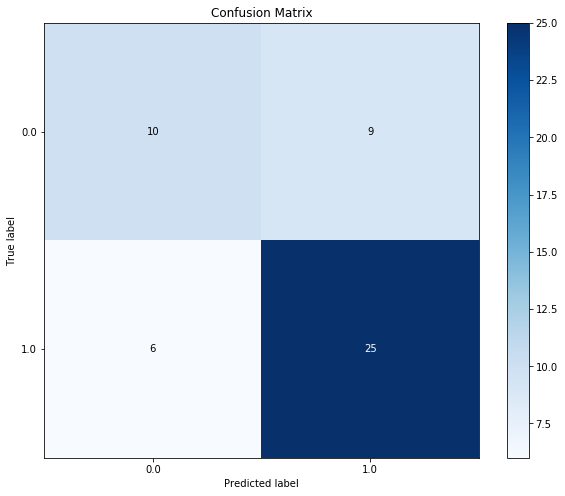

In [27]:
# check validation statistics (Classification Summary)
print(classification_report(y_test_new, prediction2)) # from confusion matrix Logistic perform well without variable reduction
# Plot confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test_new, prediction2, figsize=(10, 8))
plt.show()

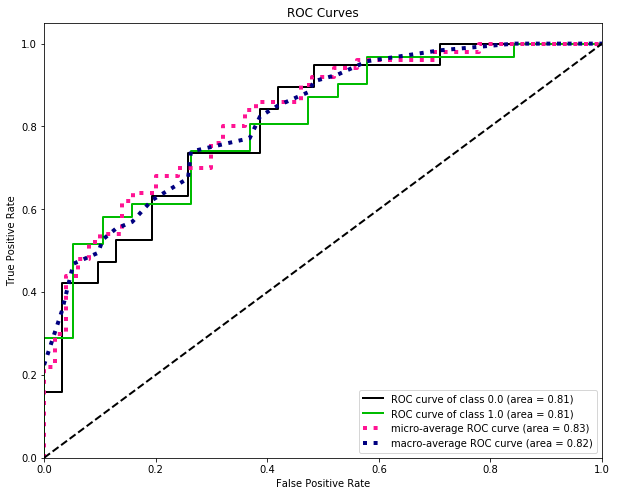

In [28]:
# ROC Curves
y_probas = clf_lr.predict_proba(X_test_new)
skplt.metrics.plot_roc(y_test_new, y_probas, figsize=(10, 8))   # Plot ROC Curve
plt.show()

## test sample is too small so ROC curve is little bit as expected.

In [32]:
#Prediction on test data
prediction = model_lr.predict(X_test)
print(prediction)
prediction_prob = model_lr.predict_proba(X_test)
#print(prediction_prob)

predictions_df = pd.DataFrame(prediction)
predictions_df.rename(columns={0:'target'}, inplace=True)
result = pd.concat([testing_data['id'], predictions_df], axis=1)
print(result)

#result.to_csv('C:\\Users\\datacore\\OneDrive\\Desktop\\Interview\\Bonamy_finch\\Prediction.csv', index=False)

[1. 0. 1. ... 0. 1. 0.]
          id  target
0        250     1.0
1        251     0.0
2        252     1.0
3        253     1.0
4        254     0.0
...      ...     ...
19745  19995     1.0
19746  19996     1.0
19747  19997     0.0
19748  19998     1.0
19749  19999     0.0

[19750 rows x 2 columns]


In [ ]:
## End of code